In [572]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical



In [573]:
df = pd.read_csv("data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [574]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
koi_fpflag_nt,6991.0,0.157059,0.363882,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_fpflag_ss,6991.0,0.244743,0.429966,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_fpflag_co,6991.0,0.202975,0.402243,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_fpflag_ec,6991.0,0.125018,0.330763,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_period,6991.0,56.191248,117.570962,2.598197e-01,2.620126,8.947426,34.282605,1.071233e+03
koi_period_err1,6991.0,0.001851,0.007185,1.100000e-08,0.000005,0.000033,0.000240,1.568000e-01
koi_period_err2,6991.0,-0.001851,0.007185,-1.568000e-01,-0.000240,-0.000033,-0.000005,-1.100000e-08
koi_time0bk,6991.0,164.488820,67.020475,1.205159e+02,132.683917,136.739230,169.937005,1.472522e+03
koi_time0bk_err1,6991.0,0.009340,0.021989,8.700000e-06,0.001145,0.003990,0.010000,5.690000e-01
koi_time0bk_err2,6991.0,-0.009340,0.021989,-5.690000e-01,-0.010000,-0.003990,-0.001145,-8.700000e-06


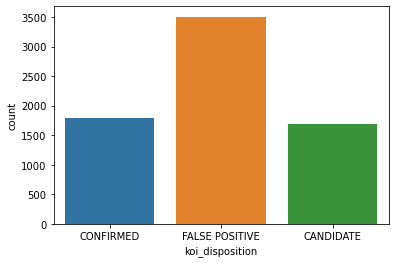

In [575]:
sns.countplot(x='koi_disposition', data=df)

In [576]:
X = df.drop('koi_disposition', axis=1).values
y = df['koi_disposition']

In [577]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [578]:
label_encoder.classes_

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [579]:
label_encoder.inverse_transform([0])

array(['CANDIDATE'], dtype=object)

In [580]:
one_hot_y = to_categorical(encoded_y)
one_hot_y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [581]:
X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y, test_size=0.3)

scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [582]:
print(X_train.shape, y_train.shape)

(4893, 40) (4893, 3)


## Build ANN model, multiclass categorical

In [583]:
model = Sequential()
model.add(Dense(units=80, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=80, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(units=80, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(units=80, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Early stop to avoid overfitting

In [584]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [585]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=600, callbacks=[early_stop], verbose=0)

Epoch 00104: early stopping


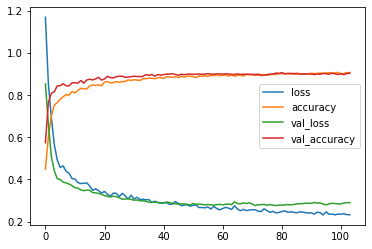

In [586]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [587]:
# predictions = model.predict(X_test)

In [588]:
model.evaluate(X_test, y_test)

66/66 [==============================] - 0s 455us/step - loss: 0.2891 - accuracy: 0.9032


[0.2890830338001251, 0.9032411575317383]

In [589]:
predictions = model.predict_classes(X_test)

In [590]:
#label_encoder.inverse_transform(predictions)

In [591]:
#np.argmax(y_test, axis=1)

In [592]:
confusion_matrix(np.argmax(y_test, axis=1), predictions )

array([[ 397,  101,   11],
       [  76,  449,   12],
       [   3,    0, 1049]], dtype=int64)

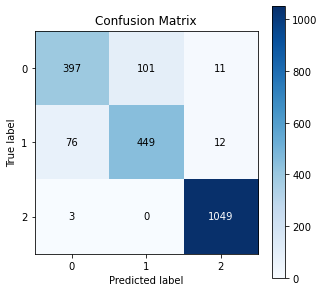

In [593]:
skplt.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), predictions, figsize=(5,5))

In [594]:

print(classification_report(np.argmax(y_test, axis=1), predictions))

precision    recall  f1-score   support

           0       0.83      0.78      0.81       509
           1       0.82      0.84      0.83       537
           2       0.98      1.00      0.99      1052

    accuracy                           0.90      2098
   macro avg       0.88      0.87      0.87      2098
weighted avg       0.90      0.90      0.90      2098



## Save model

In [595]:
model.save("models/ann.h5")